In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import math
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =20,6

In [2]:
dataset_original = pd.read_csv('1.csv',delimiter=";\t",engine='python')
dataset_original

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s]
0,1376314846,4,11703.99824,10912.027692,93.233333,67108864.0,6.129274e+06,0.133333,15981.600000,0.000000,2.133333
1,1376315146,4,11703.99824,10890.570362,93.050000,67108864.0,6.755624e+06,1.333333,19137.333333,0.000000,2.600000
2,1376315446,4,11703.99824,10434.114431,89.150000,67108864.0,8.947846e+06,2.533333,19974.933333,535.666667,23.933333
3,1376315746,4,11703.99824,10539.450415,90.050000,67108864.0,1.879048e+07,5.466667,8791.800000,349.666667,5.466667
4,1376316046,4,11703.99824,10951.041020,93.566667,67108864.0,9.305761e+06,5.400000,15679.533333,0.000000,2.066667
...,...,...,...,...,...,...,...,...,...,...,...
8629,1378905598,4,11703.99824,83.878654,0.716667,67108864.0,0.000000e+00,0.000000,1.000000,0.000000,1.000000
8630,1378905898,4,11703.99824,81.927988,0.700000,67108864.0,0.000000e+00,0.000000,1.000000,0.000000,1.000000
8631,1378906198,4,11703.99824,76.075989,0.650000,67108864.0,0.000000e+00,0.000000,1.000000,0.000000,1.000000
8632,1378906498,4,11703.99824,85.829320,0.733333,67108864.0,0.000000e+00,0.000000,1.000000,0.000000,1.000000


Code for getting Memory Percentage

In [142]:
memory_usage = []
for i in range(0, num_rows):
    memory_usage.append((df['Memory usage [KB]'][i]/df['Memory capacity provisioned [KB]'][i]) * 100)
df.insert(8, "Memory usage [%]", memory_usage)
num_cols = len(df.columns)
df.head()

NameError: name 'num_rows' is not defined

Code for generating Request generated

In [ ]:
requests = []
for i in range(0, num_rows):
    requests_generated = (((0.85*data['CPU usage [%]'][i])+(0.15*data['Memory usage [%]'][i]))/100) * 3000
    requests.append(int(round(requests_generated)))
data.insert(2, "Requests generated", requests)

In [3]:
dateparse = lambda dates: pd.to_datetime(dates, unit = 's')

In [4]:
df_main = pd.read_csv('webserver.csv', parse_dates = ['Timestamp [ms]'], index_col = 'Timestamp [ms]', date_parser = dateparse)
df_main.head(10)

,Date,Requests generated,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Memory usage [%]
Timestamp [ms],,,,,,,,
2013-08-12 13:40:46,2013-08-12 19:10:46,2419,11703.99824,10912.027692,93.233333,67108864.0,6.129274e+06,9.133331
2013-08-12 13:45:46,2013-08-12 19:15:46,2418,11703.99824,10890.570362,93.050000,67108864.0,6.755624e+06,10.066664
2013-08-12 13:50:46,2013-08-12 19:20:46,2333,11703.99824,10434.114431,89.150000,67108864.0,8.947846e+06,13.333330
2013-08-12 13:55:46,2013-08-12 19:25:46,2422,11703.99824,10539.450415,90.050000,67108864.0,1.879048e+07,27.999996
2013-08-12 14:00:46,2013-08-12 19:30:46,2448,11703.99824,10951.041020,93.566667,67108864.0,9.305761e+06,13.866664
2013-08-12 14:05:46,2013-08-12 19:35:46,2420,11703.99824,10913.978359,93.250000,67108864.0,6.352970e+06,9.466664
2013-08-12 14:10:46,2013-08-12 19:40:46,2406,11703.99824,10855.458368,92.750000,67108864.0,6.129274e+06,9.133331
2013-08-12 14:15:46,2013-08-12 19:45:46,2278,11703.99824,10157.119806,86.783333,67108864.0,9.753152e+06,14.533329
2013-08-12 14:20:46,2013-08-12 19:50:46,2423,11703.99824,10477.029091,89.516667,67108864.0,2.093796e+07,31.199996


In [5]:
df = df_main[['Requests generated']]

In [6]:
df_main = df.resample('D',closed='right',label ='left').mean()

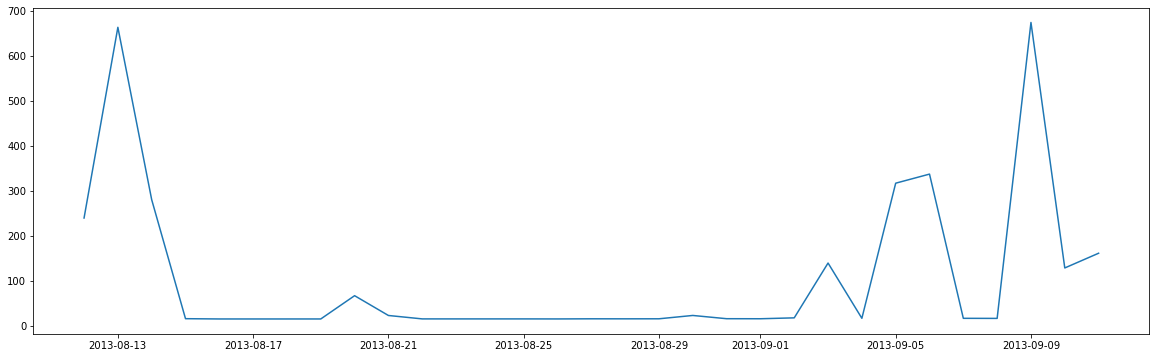

In [7]:
plt.plot(df_main)

In [8]:
df_main.head()

,Requests generated
Timestamp [ms],
2013-08-12,239.879032
2013-08-13,663.850694
2013-08-14,280.649306
2013-08-15,16.086806
2013-08-16,15.461806


In [9]:
from sklearn.model_selection import train_test_split
train ,test_data = train_test_split(df_main,test_size=0.1,shuffle=False)
train

,Requests generated
Timestamp [ms],
2013-08-12,239.879032
2013-08-13,663.850694
2013-08-14,280.649306
2013-08-15,16.086806
2013-08-16,15.461806
2013-08-17,15.434028
2013-08-18,15.458333
2013-08-19,15.468750
2013-08-20,67.206294


In [10]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dicky Fuller test:')
dftest = adfuller(train['Requests generated'],autolag='AIC')

dfoutput =pd.Series(dftest[0:4],index=['Test Statistic','p-Values','#Lags used','Number os Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] =value
print(dfoutput)

Results of Dicky Fuller test:
Test Statistic                 -0.361137
p-Values                        0.916388
#Lags used                      8.000000
Number os Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


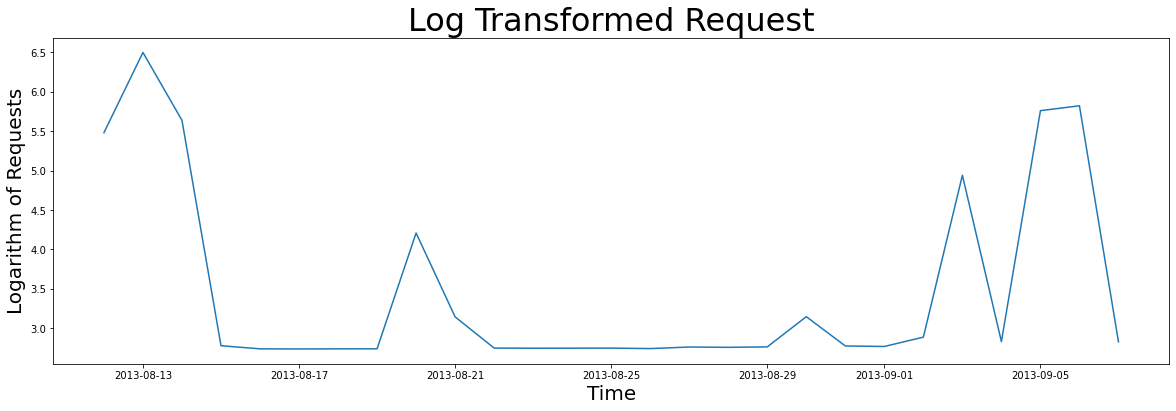

In [11]:
train_log = np.log(train)

plt.title("Log Transformed Request", fontsize=32)
plt.xlabel("Time", fontsize=20)
plt.ylabel("Logarithm of Requests", fontsize=20)
plt.plot(train_log)

In [12]:
# Dickey-Fuller test
print('Results of Dickey-Fuller Test')
test = adfuller(train_log, autolag='AIC')
output = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in test[4].items():
    output['Critical Value (%s)'%key] = value
print(output)

Results of Dickey-Fuller Test
Test Statistic                 -3.168977
p-value                         0.021852
#Lags Used                      0.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


In [13]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(train_log, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=106.663, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=101.598, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=104.843, Time=0.00 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=91.398, Time=0.01 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=91.811, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=89.491, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=99.791, Time=0.01 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=90.114, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=89.544, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=90.646, Time=0.03 sec

Best mod

In [14]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_log,order=(2,2,1))
results_AR = model.fit(disp=-1)
print(results_AR.summary())

                               ARIMA Model Results                               
Dep. Variable:     D2.Requests generated   No. Observations:                   25
Model:                    ARIMA(2, 2, 1)   Log Likelihood                 -39.276
Method:                          css-mle   S.D. of innovations              1.041
Date:                   Fri, 04 Feb 2022   AIC                             88.552
Time:                           16:22:21   BIC                             94.646
Sample:                       08-14-2013   HQIC                            90.242
                            - 09-07-2013                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0356      0.014      2.476      0.013       0.007       0.064
ar.L1.D2.Requests generated    -0.6373      0.230     -2

D:\melro\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [15]:
# from datetime import datetime

# datetime_object = datetime.strptime('Aug 12 2013  1:40PM', '%b %d %Y %I:%M%p')
# print(datetime_object)
fc, se, conf = results_AR.forecast(3, alpha=0.05) # 95% conf
fc

array([5.65320219, 6.45613979, 5.56038592])

In [16]:
real_requests = []
for i in fc:
    real_requests.append(int(math.exp(i)))
print(real_requests)

[285, 636, 259]


In [17]:
real_values = []
for i in fc:
    real_values.append(int(math.exp(i)))
li = np.array(real_values)
date=['2013-09-08','2013-09-09','2013-09-10']
li=li.ravel()
df=pd.DataFrame({'date':date,'value':li})
threshold=300
for i in range(len(df)):
  #print(df['date'][i],df['value'][i],df['value'][i+1],df['value'][i+2])
  if df['value'][i] > threshold:
    print(df['date'][i])
    print('The server will have '+str(df['value'][i])+' Hits')
    print('RESOURCE NEEDS TO BE ALLOCATED!!!!')

2013-09-09
The server will have 636 Hits
RESOURCE NEEDS TO BE ALLOCATED!!!!


In [18]:
test_data

,Requests generated
Timestamp [ms],
2013-09-08,16.711806
2013-09-09,674.618056
2013-09-10,128.864583
2013-09-11,161.579268
